# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split

# Знакомство с данными

In [3]:
data= pd.read_csv('autos.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Описание данных: 

    DateCrawled - дата получения данных
    Price - стоимость авто
    VehicleType - тип авто
    RegistrationYear - год регистрации авто
    Gearbox - коробка передач
    Power - мощность двигателя
    Model - модель авто
    Kilometer - пробег авто
    RegistrationMonth - месяц регистрации авто
    FuelType - тип топлива
    Brand - марка авто
    NotRepaired - было ли авто в ремонте
    DateCreated - дата создания объявления
    NumberOfPictures - количество фотографий авто
    PostalCode - почтовый индекс
    LastSeen - дата последнего просмотра объявления

In [5]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.isnull().sum() #проверка на пропущенные значения

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [7]:
dataset = data.dropna(subset=["Model", "NotRepaired", "VehicleType", "Gearbox", "FuelType"])
dataset.info()
#удаляем строки, которые содержат хотя бы одно пропущенное значение

<class 'pandas.core.frame.DataFrame'>
Index: 245814 entries, 3 to 354367
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        245814 non-null  object
 1   Price              245814 non-null  int64 
 2   VehicleType        245814 non-null  object
 3   RegistrationYear   245814 non-null  int64 
 4   Gearbox            245814 non-null  object
 5   Power              245814 non-null  int64 
 6   Model              245814 non-null  object
 7   Kilometer          245814 non-null  int64 
 8   RegistrationMonth  245814 non-null  int64 
 9   FuelType           245814 non-null  object
 10  Brand              245814 non-null  object
 11  NotRepaired        245814 non-null  object
 12  DateCreated        245814 non-null  object
 13  NumberOfPictures   245814 non-null  int64 
 14  PostalCode         245814 non-null  int64 
 15  LastSeen           245814 non-null  object
dtypes: int64(7), object(9)
me

In [8]:
dataset.isnull().sum() #проверка на то, что в датасете нет нулевых значений

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [9]:
dataset.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [10]:
dataset.drop('LastSeen', axis =1, inplace = True)
dataset.drop('PostalCode', axis =1, inplace = True)
dataset.drop('DateCrawled', axis =1, inplace = True)
dataset.drop('DateCreated', axis =1, inplace = True)
dataset.head()

C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\111965258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('LastSeen', axis =1, inplace = True)
C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\111965258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('PostalCode', axis =1, inplace = True)
C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\111965258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,0
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,0
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,0
6,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,0
7,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,0


# Визуализация и анализ данных

In [11]:
car_pivot = pd.pivot_table(dataset, 'Price','Brand',aggfunc=np.mean)
car_pivot.head()

C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\1994292585.py:1: FutureWarning: The provided callable <function mean at 0x000001E6B9AB1430> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  car_pivot = pd.pivot_table(dataset, 'Price','Brand',aggfunc=np.mean)


,Price
Brand,
alfa_romeo,4208.796429
audi,7105.221165
bmw,6899.172699
chevrolet,5978.890016
chrysler,4195.290227


In [12]:
mean_price = dataset.groupby('Brand').agg({'Price':'mean','Kilometer':'mean'}).reset_index()
mean_price

,Brand,Price,Kilometer
0,alfa_romeo,4208.796429,129107.142857
1,audi,7105.221165,135683.863784
2,bmw,6899.172699,137449.163118
3,chevrolet,5978.890016,100510.920437
4,chrysler,4195.290227,134807.502468
5,citroen,3915.479934,119051.324051
6,dacia,6046.785615,85518.672199
7,daewoo,1121.234421,123916.913947
8,daihatsu,2024.032692,116490.384615
9,fiat,3189.634054,113895.376361


<Axes: xlabel='Brand', ylabel='Price'>

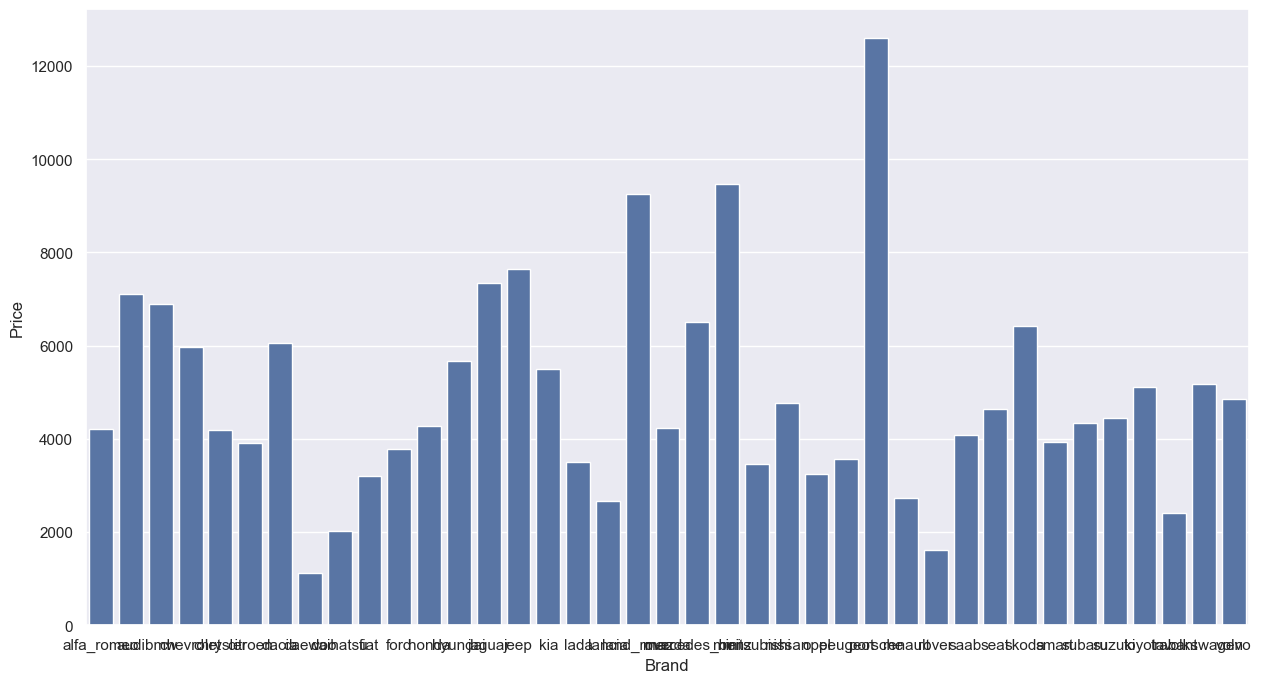

In [13]:
sns.barplot(data=car_pivot, x='Brand', y='Price')

<Axes: xlabel='Brand', ylabel='Price'>

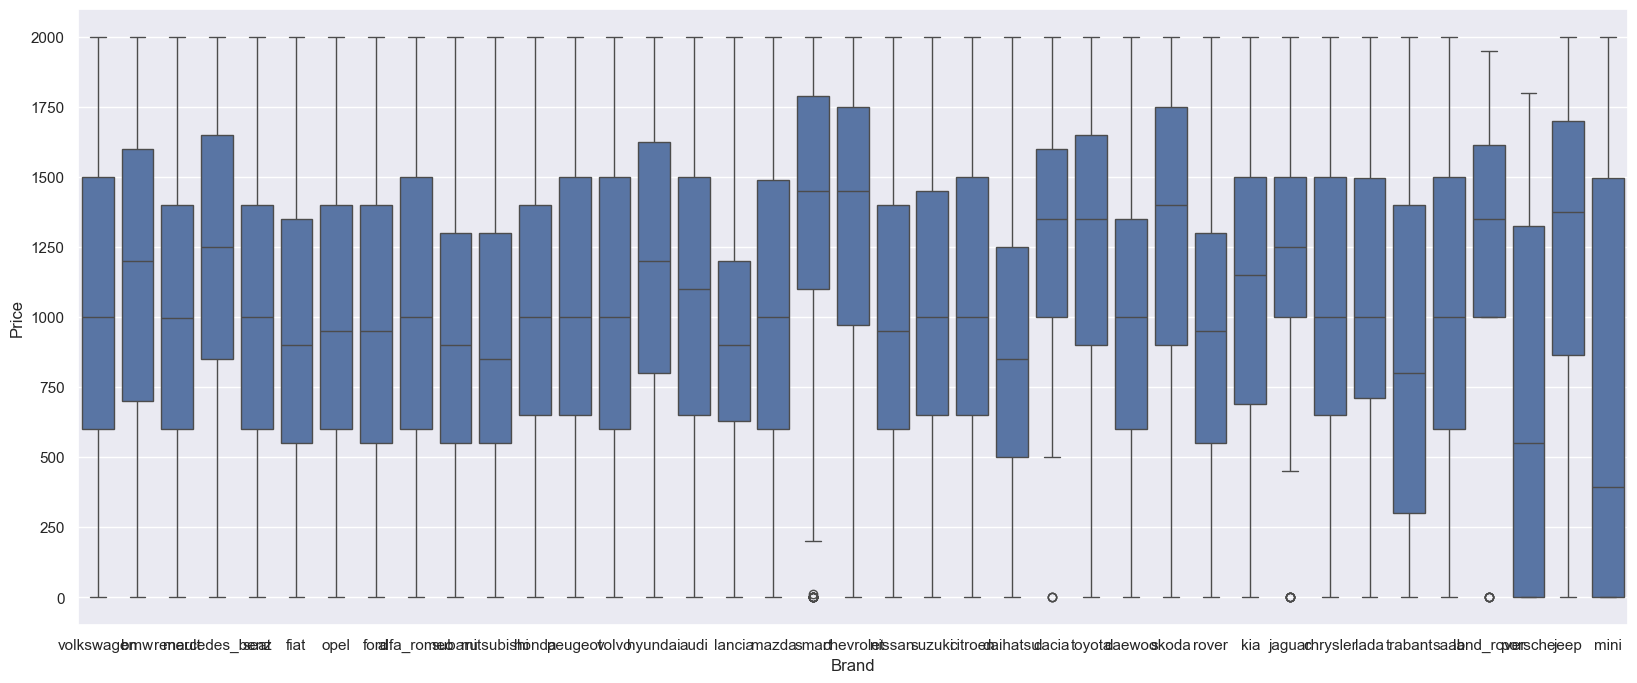

In [14]:
b = dataset[dataset.Price <2000]
plt.figure(figsize=(20,8))
sns.boxplot(y="Price",x="Brand",data =b)

Таким образом, видно, что средняя цена автомобилей варьируется в зависимости от марки и пробега

In [15]:
car_pivot = pd.pivot_table(data, 'Price',['VehicleType'],aggfunc=np.mean)
car_pivot

C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\2785715435.py:1: FutureWarning: The provided callable <function mean at 0x000001E6B9AB1430> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  car_pivot = pd.pivot_table(data, 'Price',['VehicleType'],aggfunc=np.mean)


,Price
VehicleType,
bus,5487.071347
convertible,6807.014305
coupe,6010.884613
other,3563.838200
sedan,4722.660496
small,2677.651439
suv,9009.206485
wagon,4880.346208


<Axes: xlabel='VehicleType', ylabel='Price'>

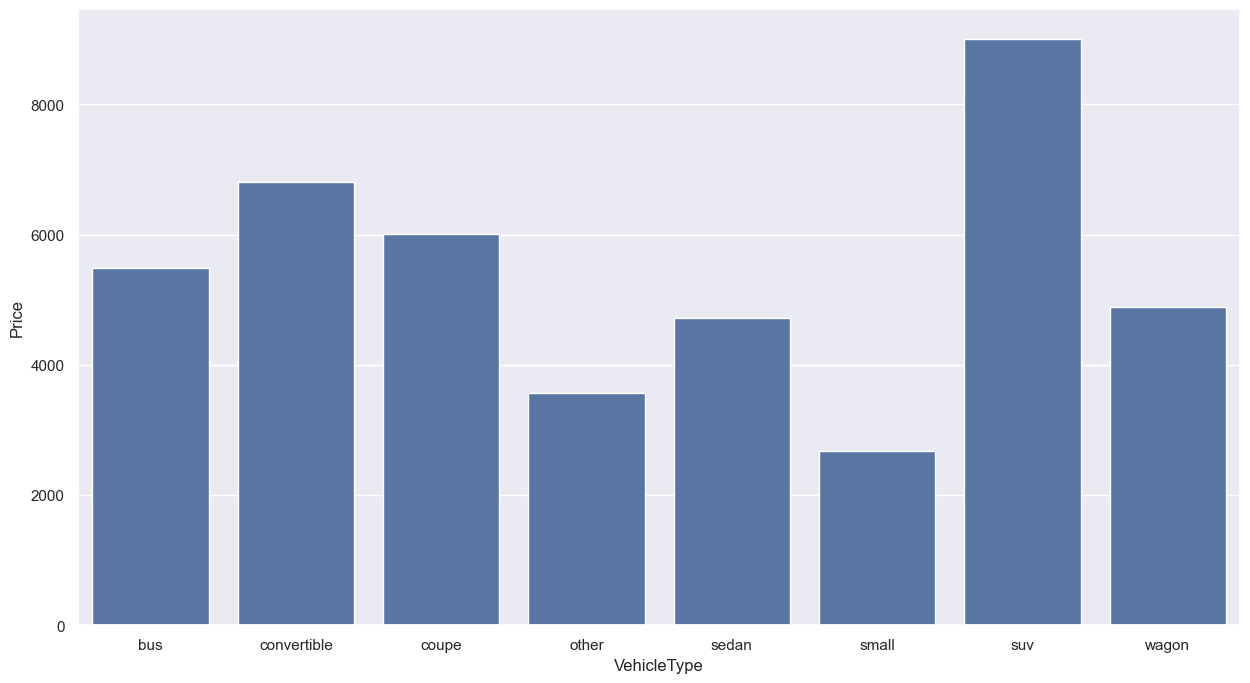

In [16]:
sns.barplot(data=car_pivot, x='VehicleType', y='Price')

In [17]:
agg_price = data.groupby('VehicleType').agg({'Price':'mean','Kilometer':'mean'}).reset_index()
agg_price

,VehicleType,Price,Kilometer
0,bus,5487.071347,131880.278019
1,convertible,6807.014305,118427.956244
2,coupe,6010.884613,129538.452020
3,other,3563.838200,122700.729927
4,sedan,4722.660496,130967.230502
5,small,2677.651439,119433.866543
6,suv,9009.206485,121564.688229
7,wagon,4880.346208,138273.716355


In [18]:
le = LabelEncoder()
dataset['VehicleType']=le.fit_transform(dataset['VehicleType'])
dataset['Gearbox']=le.fit_transform(dataset['Gearbox'])
dataset['FuelType']=le.fit_transform(dataset['FuelType'])
dataset['Brand']=le.fit_transform(dataset['Brand'])
dataset['Model']=le.fit_transform(dataset['Model'])
dataset['NotRepaired']=le.fit_transform(dataset['NotRepaired'])
dataset.head()

C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\3149804182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['VehicleType']=le.fit_transform(dataset['VehicleType'])
C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\3149804182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Gearbox']=le.fit_transform(dataset['Gearbox'])
C:\Users\Виктория\AppData\Local\Temp\ipykernel_3400\3149804182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures
3,1500,5,2001,1,75,116,150000,6,6,37,0,0
4,3600,5,2008,1,69,101,90000,7,2,31,0,0
5,650,4,1995,1,102,11,150000,10,6,2,1,0
6,2200,1,2004,1,109,8,150000,8,6,25,0,0
7,0,4,1980,1,50,166,40000,7,6,37,0,0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245814 entries, 3 to 354367
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Price              245814 non-null  int64
 1   VehicleType        245814 non-null  int32
 2   RegistrationYear   245814 non-null  int64
 3   Gearbox            245814 non-null  int32
 4   Power              245814 non-null  int64
 5   Model              245814 non-null  int32
 6   Kilometer          245814 non-null  int64
 7   RegistrationMonth  245814 non-null  int64
 8   FuelType           245814 non-null  int32
 9   Brand              245814 non-null  int32
 10  NotRepaired        245814 non-null  int32
 11  NumberOfPictures   245814 non-null  int64
dtypes: int32(6), int64(6)
memory usage: 18.8 MB


In [18]:
X = dataset.drop(["Price"], axis=1)
Y = dataset["Price"]
X.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures
3,5,2001,1,75,116,150000,6,6,37,0,0
4,5,2008,1,69,101,90000,7,2,31,0,0
5,4,1995,1,102,11,150000,10,6,2,1,0
6,1,2004,1,109,8,150000,8,6,25,0,0
7,4,1980,1,50,166,40000,7,6,37,0,0


# Построение модели

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

Линейная регрессия — это базовая модель, которая предполагает линейную зависимость между целевой переменной (Price) и признаками.

Плюсы: простота интерпретации, быстрое обучение.

Минусы: неэффективна, если данные имеют сложные нелинейные зависимости.

In [20]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_pred = model.predict(X_test)

mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11263276.578791803
R^2 0.49890495352078224
RMSE 3356.0805381861446


MSE (Mean Squared Error) - среднеквадратичная ошибка, средний квадрат ошибки определения какой-либо величины.


R^2 - коэффициент детерминации, представляет собой статистическую меру, используемую в регрессионном анализе для оценки соответствия модели наблюдаемым данным. Показывает, насколько хорошо модель объясняет данные (1 — идеально, 0 — случайное угадывание, <0 — плохо).

RMSE - корень из среднеквадратичной ошибки.

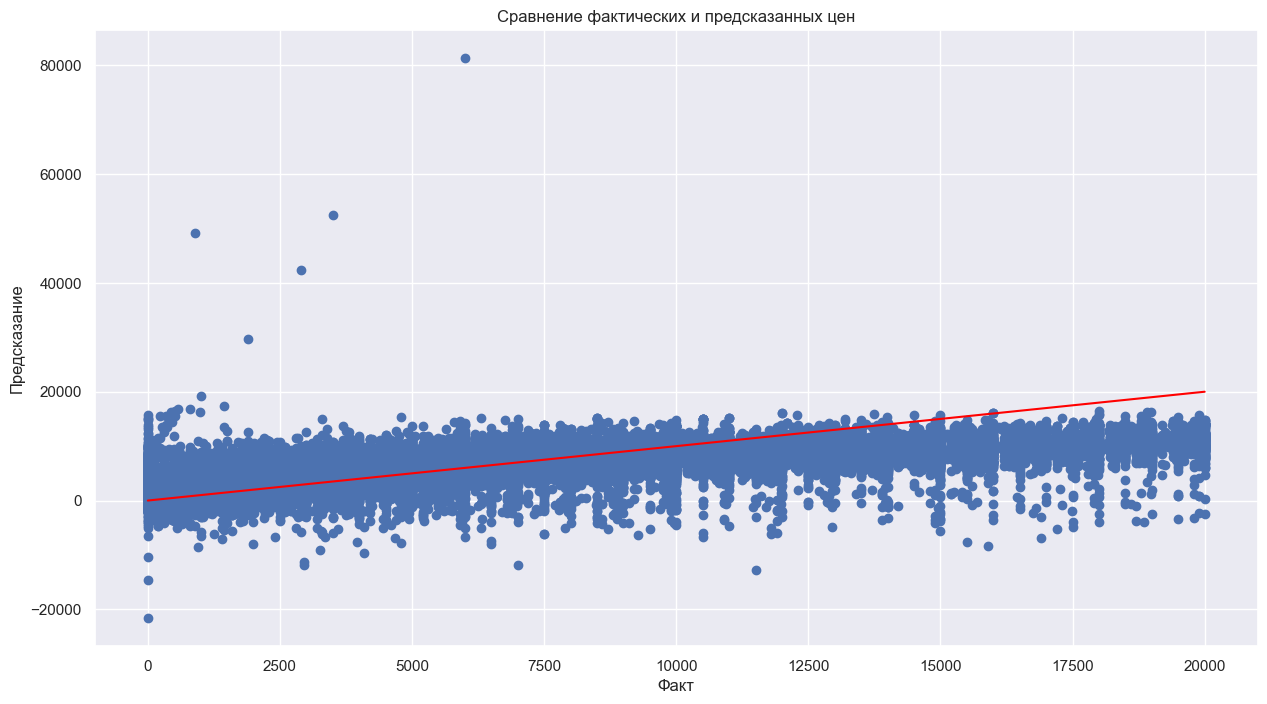

In [22]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Факт')
plt.ylabel('Предсказание')
plt.title('Сравнение фактических и предсказанных цен')
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.show()

Ridge — это линейная регрессия с L2-регуляризацией. Она добавляет штраф за квадраты коэффициентов, что уменьшает их значения, но не обнуляет их полностью.

Плюсы: Уменьшение переобучения
Минусы: Не исключает признаки, что может быть недостатком, если в данных много незначимых признаков

In [23]:
model = Ridge(alpha=1)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11263276.578791803
R^2 0.49890495352078224
RMSE 3356.0805381861446


In [24]:
model.coef_

array([-2.21477299e+02,  2.76553966e+02, -2.09453889e+03,  4.19127977e+00,
        7.56382100e-01, -3.77601121e-02,  8.10590466e+00, -4.70353859e+02,
       -3.16682743e+01, -2.00597388e+03,  0.00000000e+00])

In [25]:
coefficients = model.coef_
normalized_coefficients = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Вычисление feature_score
feature_scores = normalized_coefficients

top_features_indices = np.argsort(feature_scores)[::-1]  # Сортировка в порядке убывания
top_features_values = feature_scores[top_features_indices]

top_features_dict = {f"Feature {i+1}": v for i, v in zip(top_features_indices, top_features_values)}

print("Feature Scores:", feature_scores)
print("\nTop Features:")
for name, score in top_features_dict.items():
    print(f"{name}: {score}")

Feature Scores: [4.33109372e-02 5.40814410e-02 4.09597024e-01 8.19624658e-04
 1.47914111e-04 7.38416918e-06 1.58514814e-03 9.19799301e-02
 6.19288138e-03 3.92277715e-01 0.00000000e+00]

Top Features:
Feature 3: 0.4095970244182459
Feature 10: 0.39227771482658186
Feature 8: 0.09197993008059793
Feature 2: 0.05408144103410289
Feature 1: 0.043310937182800456
Feature 9: 0.006192881382008395
Feature 7: 0.0015851481383145798
Feature 4: 0.0008196246575170892
Feature 5: 0.00014791411064770882
Feature 6: 7.38416918305246e-06
Feature 11: 0.0


Lasso — это линейная регрессия с L1-регуляризацией. Она добавляет штраф за абсолютные значения коэффициентов, что может привести к обнулению некоторых коэффициентов

Плюсы: Отбор признаков, уменьшение влияния незначимых признаков
Минусы: Может быть неэффективна, если все признаки важны

In [26]:
model = Lasso(alpha=0.3)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11263276.578791803
R^2 0.49890495352078224
RMSE 3356.0805381861446


In [27]:
model.coef_

array([-2.21410625e+02,  2.76570871e+02, -2.09277298e+03,  4.19224828e+00,
        7.56333613e-01, -3.77608818e-02,  8.09776416e+00, -4.70322266e+02,
       -3.16703739e+01, -2.00309817e+03,  0.00000000e+00])

In [28]:

coefficients = model.coef_
normalized_coefficients = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Вычисление feature_score
feature_scores = normalized_coefficients



top_features_indices = np.argsort(feature_scores)[::-1]  # Сортировка в порядке убывания
top_features_values = feature_scores[top_features_indices]

top_features_dict = {f"Feature {i+1}": v for i, v in zip(top_features_indices, top_features_values)}

print("Feature Scores:", feature_scores)
print("\nTop Features:")
for name, score in top_features_dict.items():
    print(f"{name}: {score}")



Feature Scores: [4.33379691e-02 5.41348000e-02 4.09630437e-01 8.20572755e-04
 1.48041508e-04 7.39115357e-06 1.58502174e-03 9.20588698e-02
 6.19902360e-03 3.92077873e-01 0.00000000e+00]

Top Features:
Feature 3: 0.4096304372961333
Feature 10: 0.3920778730556756
Feature 8: 0.09205886977669134
Feature 2: 0.05413479999630272
Feature 1: 0.043337969117787714
Feature 9: 0.006199023601422737
Feature 7: 0.0015850217390136723
Feature 4: 0.0008205727553829642
Feature 5: 0.0001480415080190704
Feature 6: 7.391153570863438e-06
Feature 11: 0.0


SGDRegressor — это модель, которая использует стохастический градиентный спуск для минимизации функции потерь.

Плюсы: Эффективена для больших датасетов

Минусы: Может быть менее стабильной

In [29]:
model = SGDRegressor(l1_ratio=0.5, loss = 'squared_epsilon_insensitive',max_iter=2000,learning_rate='adaptive')
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11263276.578791803
R^2 0.49890495352078224
RMSE 3356.0805381861446


Создаётся и обучается линейная модель SGDRegressor (Стохастический градиентный спуск) из sklearn.linear_model

learning_rate='adaptive' — шаг обучения адаптируется в зависимости от итераций

После обучения модель fit подстраивает свои коэффициенты model.coef_ под данные.


In [30]:
model.coef_

array([ 1.11792562e+13,  1.33469667e+11,  3.24310069e+12,  6.08452775e+10,
       -4.31796364e+12,  3.38486191e+10, -2.11984367e+13, -4.86676781e+12,
        1.98412084e+13, -7.13394372e+10,  0.00000000e+00])

model.coef_ содержит коэффициенты модели для каждого признака.

In [31]:
feature_score = {}

for fname, score in zip(X.columns, model.coef_):
    feature_score[fname]= round(score/10000000,2)
    
    
top_features = {k:v for k,v in feature_score.items() if v>0}
top_features

{'VehicleType': 1117925.62,
 'RegistrationYear': 13346.97,
 'Gearbox': 324310.07,
 'Power': 6084.53,
 'Kilometer': 3384.86,
 'Brand': 1984120.84}


Создаётся словарь feature_score, где коэффициенты делятся на 10⁷ (возможно, чтобы нормализовать значения).

Затем из feature_score выбираются только те признаки, у которых значение больше 0 → top_features.

Коэффициент показывает, насколько сильно данный признак влияет на предсказание целевой переменной Y.

top_features — это список наиболее важных признаков, которые положительно влияют на предсказание модели.

В данном случае Ridge показал лучшие результаты, что может указывать на наличие мультиколлинеарности в данных. Если бы в данных было много незначимых признаков, Lasso мог бы быть более полезным. SGDRegressor может быть полезен для больших датасетов, но требует дополнительной настройки.
